In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
file_path_episodes = "../exploration/Exploration - episodes.ipynb"

In [4]:
data_episodes = pd.read_csv("../gitignore/title.episode.tsv", sep="\t")

In [5]:
# Type des colonnes
print("Types de colonnes - Episodes:")
data_episodes.info()

Types de colonnes - Episodes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640119 entries, 0 to 8640118
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tconst         object
 1   parentTconst   object
 2   seasonNumber   object
 3   episodeNumber  object
dtypes: object(4)
memory usage: 263.7+ MB


In [6]:
# Remplacent '\N' par NaN
data_episodes.replace("\\N", np.nan, inplace=True)

In [7]:
# Conversion de 'seasonNumber' et 'episodeNumber' en valeurs numériques
data_episodes['seasonNumber'] = pd.to_numeric(data_episodes['seasonNumber'], errors='coerce')
data_episodes['episodeNumber'] = pd.to_numeric(data_episodes['episodeNumber'], errors='coerce')

In [8]:
# Nombre de NaN dans chaque colonne
print("\nValeurs manquantes - Episodes:")
print(data_episodes.isnull().sum())


Valeurs manquantes - Episodes:
tconst                 0
parentTconst           0
seasonNumber     1742759
episodeNumber    1742759
dtype: int64


In [9]:
# Vérification
print("\nInfo after cleaning:")
data_episodes.info()


Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640119 entries, 0 to 8640118
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   tconst         object 
 1   parentTconst   object 
 2   seasonNumber   float64
 3   episodeNumber  float64
dtypes: float64(2), object(2)
memory usage: 263.7+ MB


In [10]:
print("\nÉchantillon de données - Episodes:")
print(data_episodes.sample(15))



Échantillon de données - Episodes:
             tconst parentTconst  seasonNumber  episodeNumber
8115557   tt8542966    tt4855208           NaN            NaN
5391930  tt29377994   tt28259452           1.0          142.0
7460989   tt6733074    tt0442646           NaN            NaN
1848400  tt13118048   tt11554102           NaN            NaN
4252061  tt22002032   tt15506924           1.0            9.0
5965985  tt32431600    tt5193522           NaN            NaN
4479673  tt23545350    tt5510950           NaN            NaN
481455   tt10090968    tt7721488           NaN            NaN
290493    tt0793093    tt0072519           2.0           22.0
3519968   tt1804736    tt0445867           4.0            9.0
1818436  tt13051076    tt0104421           1.0           46.0
1490464  tt12298564    tt0283767           NaN            NaN
2814333  tt15319320    tt0375453           3.0           11.0
2480464  tt14554096   tt12491492           1.0          173.0
2860660  tt15430226    tt1772630  

In [11]:
# Premiers aperçus des données
# Aperçu général avec .describe() et un échantillon
print("\nStatistiques descriptives - Episodes:")
print(data_episodes.describe(include="all"))

print("\nÉchantillon de données - Episodes:")
print(data_episodes.sample(5))


Statistiques descriptives - Episodes:
           tconst parentTconst  seasonNumber  episodeNumber
count     8640119      8640119  6.897360e+06   6.897360e+06
unique    8640119       212285           NaN            NaN
top     tt0031458   tt12164062           NaN            NaN
freq            1        18593           NaN            NaN
mean          NaN          NaN  3.779493e+00   4.246340e+02
std           NaN          NaN  2.396600e+01   1.336387e+03
min           NaN          NaN  1.000000e+00   0.000000e+00
25%           NaN          NaN  1.000000e+00   7.000000e+00
50%           NaN          NaN  1.000000e+00   2.800000e+01
75%           NaN          NaN  3.000000e+00   1.600000e+02
max           NaN          NaN  2.024000e+03   9.133400e+04

Échantillon de données - Episodes:
             tconst parentTconst  seasonNumber  episodeNumber
8112100   tt8534234    tt0439917           1.0          183.0
6251245  tt33483001   tt33482802           1.0          146.0
912463   tt11036670

In [12]:
# Analyse des regroupements par titres parents
# Regroupement par parentTconst et comptage du nombre d'épisodes par titre
episode_counts = data_episodes.groupby('parentTconst')['tconst'].count().reset_index()
episode_counts.rename(columns={'tconst': 'episode_count'}, inplace=True)

print("\nRépartition du nombre d'épisodes par titres parents :")
print(episode_counts.describe())


Répartition du nombre d'épisodes par titres parents :
       episode_count
count  212285.000000
mean       40.700563
std       224.447456
min         1.000000
25%         4.000000
50%         8.000000
75%        22.000000
max     18593.000000


In [13]:
# Analyse des saisons et des épisodes
# Distribution des numéros de saison
print("\nDistribution des numéros de saison")
season_counts = data_episodes['seasonNumber'].value_counts().sort_index()
print(season_counts)


Distribution des numéros de saison
seasonNumber
1.0       4414387
2.0        652614
3.0        370820
4.0        253316
5.0        185557
           ...   
2018.0          4
2019.0         16
2020.0         26
2021.0         20
2024.0          3
Name: count, Length: 311, dtype: int64


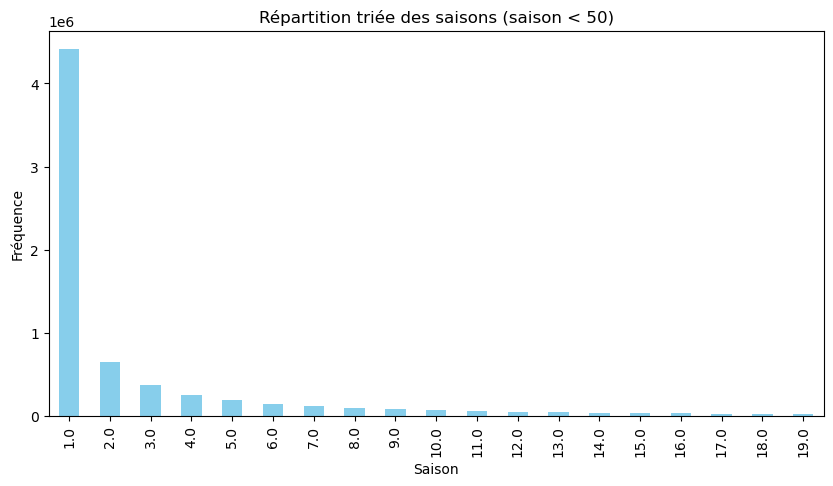

In [14]:
filtered_season_counts = season_counts[season_counts.index < 20]

plt.figure(figsize=(10, 5))
filtered_season_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition triée des saisons (saison < 50)')
plt.xlabel('Saison')
plt.ylabel('Fréquence')
plt.xticks(rotation=90)
plt.show()


In [15]:
# Distribution des numéros d'épisode
print("\nDistribution des numéros d'épisode")
print(data_episodes['episodeNumber'].value_counts().sort_index())



Distribution des numéros d'épisode
episodeNumber
0.0          6022
1.0        311475
2.0        281433
3.0        268311
4.0        251239
            ...  
72615.0         1
77305.0         1
79800.0         1
80207.0         1
91334.0         1
Name: count, Length: 15784, dtype: int64


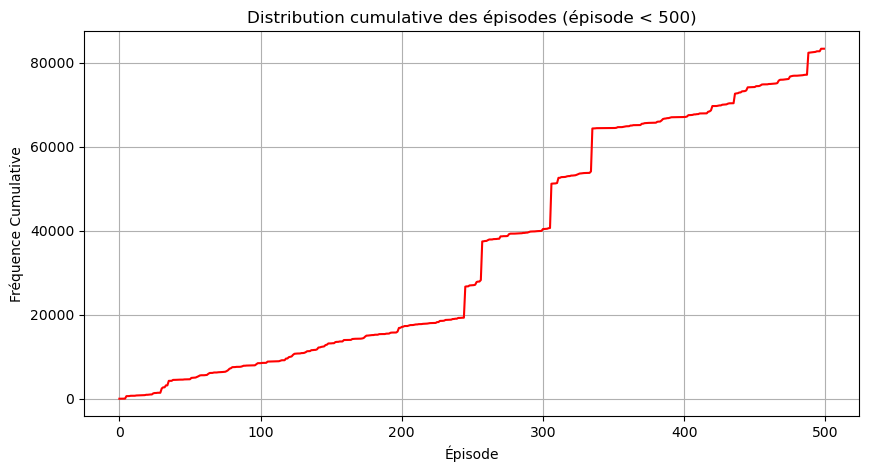

In [23]:
# Filter for episodes with number less than 500
filtered_episode_counts = episode_counts[episode_counts.index < 500]

# Calculate the cumulative sum
cumulative_counts = filtered_episode_counts['episode_count'].cumsum()

# Plot the cumulative distribution
plt.figure(figsize=(10, 5))
plt.plot(filtered_episode_counts.index, cumulative_counts, color='red')
plt.title('Distribution cumulative des épisodes (épisode < 500)')
plt.xlabel('Épisode')
plt.ylabel('Fréquence Cumulative')
plt.grid()
plt.show()
